# DBSCAN Algorithm

In [1]:
# use case:
#We are analyzing annual income and spending score using
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\ExcelR Data Science\July\July 9\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score '], dtype='object')

In [5]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score ':'Spendsscore'},inplace=True)
df

,CustomerID,Gender,Age,Income,Spendsscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


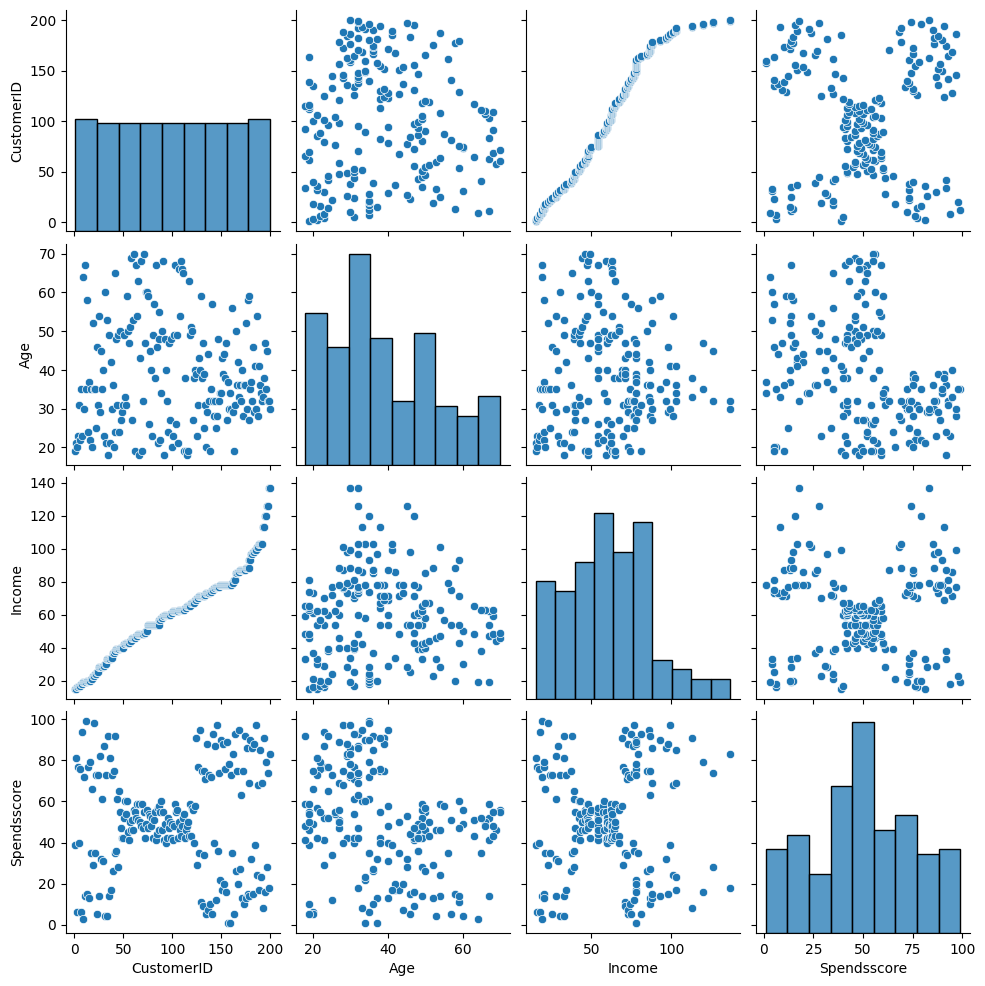

In [8]:
sns.pairplot(df)

In [9]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()

<Figure size 700x700 with 0 Axes>

In [10]:
size

Gender
Female    112
Male       88
Name: count, dtype: int64

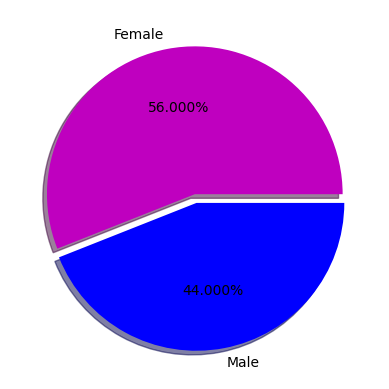

In [11]:
label=['Female','Male']
z=[0,0.06]
color=['m','b']
plt.pie(size,explode=z,labels=label,colors=color,shadow=True,autopct='%2.3f%%')
plt.show()

In [12]:
x=df.loc[:,['Income', 'Spendsscore']].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [14]:
db

DBSCAN(eps=3, min_samples=4)

In [15]:
model=db.fit(x)
label=model.labels_

In [16]:
label # -1 indicates noise

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [17]:
import numpy as np
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

In [18]:
# calculate the clusters
n_clusters=len(set(label))-(1 if -1 in label else 0)
print("Number of clusters",n_clusters)

Number of clusters 9


In [19]:
y_means=db.fit_predict(x)

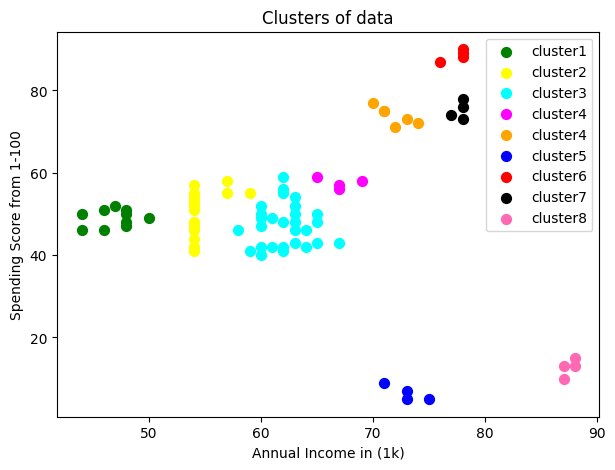

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'g',label='cluster1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow',label='cluster2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan',label='cluster3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta',label='cluster4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange',label='cluster4')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue',label='cluster5')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red',label='cluster6')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black',label='cluster7')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'hotpink',label='cluster8')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, label))

-0.1908319132560097
